In [11]:
!pip install ucimlrepo

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [6]:
# Load dataset
# Original URL: url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional-full.csv"
# Updated URL to access the data directly:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

import requests
import zipfile
import io

# Download the zip file
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad status codes

# Extract the CSV file from the zip archive
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('bank-additional/bank-additional-full.csv') as f:
        data = pd.read_csv(f, sep=';')

# Display first few rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Encode categorical features using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['y_yes'])
y = data_encoded['y_yes']  # 1 if purchased, 0 otherwise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Fit model to training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [9]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9147042162337137

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95     10965
        True       0.65      0.53      0.58      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.91      0.91     12357



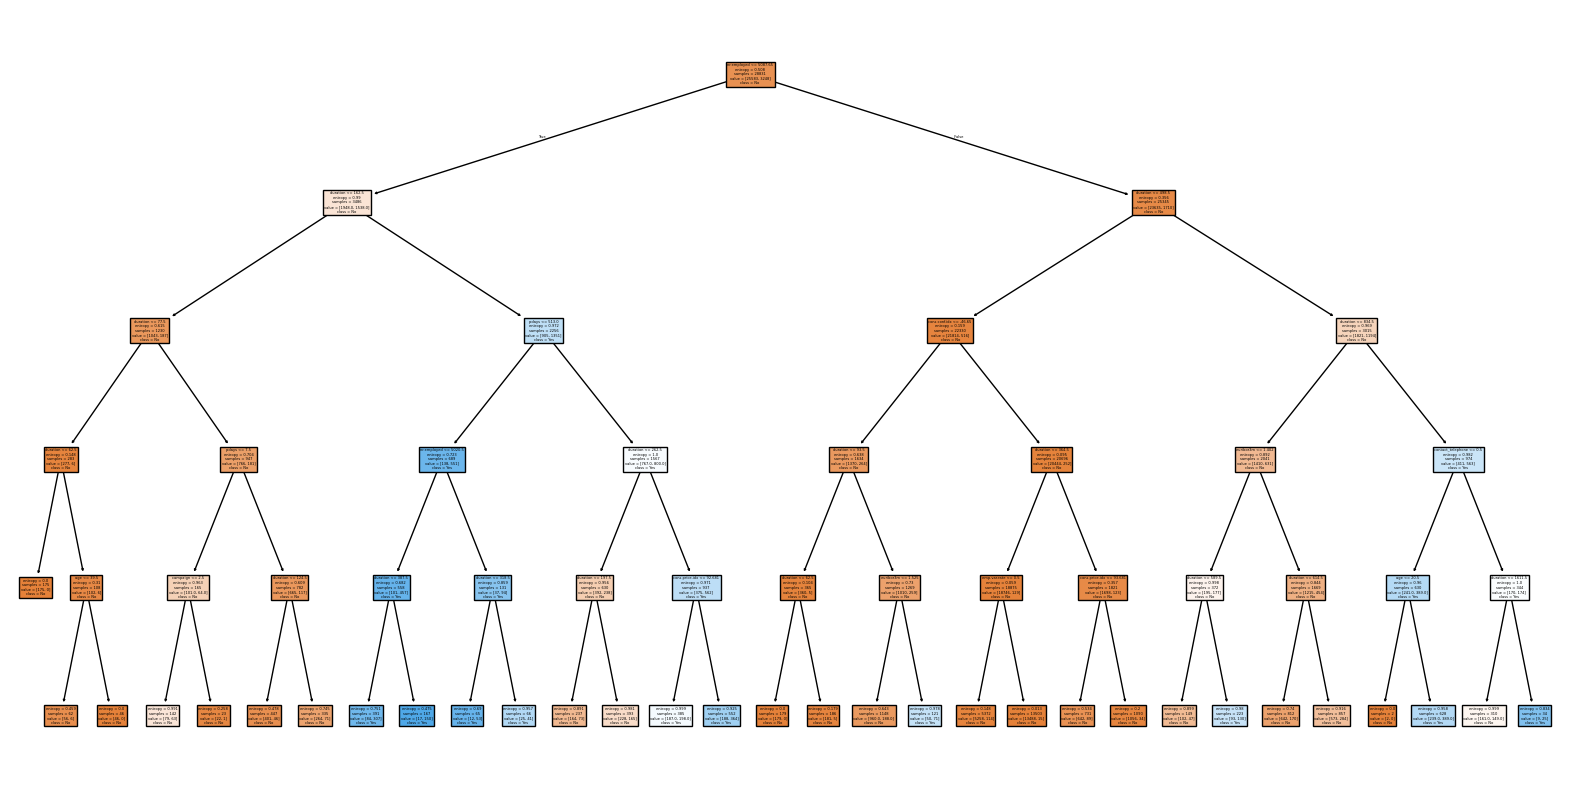

In [10]:
# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()